In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math
from scipy.optimize import curve_fit 

In [2]:
df1 = pd.read_csv('../csv/pvp_model.csv')
df2 = pd.read_csv('../csv/pvp_400_model.csv')
df3 = pd.read_csv('../csv/pve_border_model.csv')
df4 = pd.read_csv('../csv/pve_center_model.csv')

In [3]:
x1 = df1['x'].tolist()
y1 = df1['y'].tolist()

x2 = df2['x'].tolist()
y2 = df2['y'].tolist()

x3 = df3['x'].tolist()
y3 = df3['y'].tolist()

x4 = df4['x'].tolist()
y4 = df4['y'].tolist()

print(min(x1))
print(min(x2))
print(min(x3))
print(min(x4))

16.0
16.0
16.0
16.0


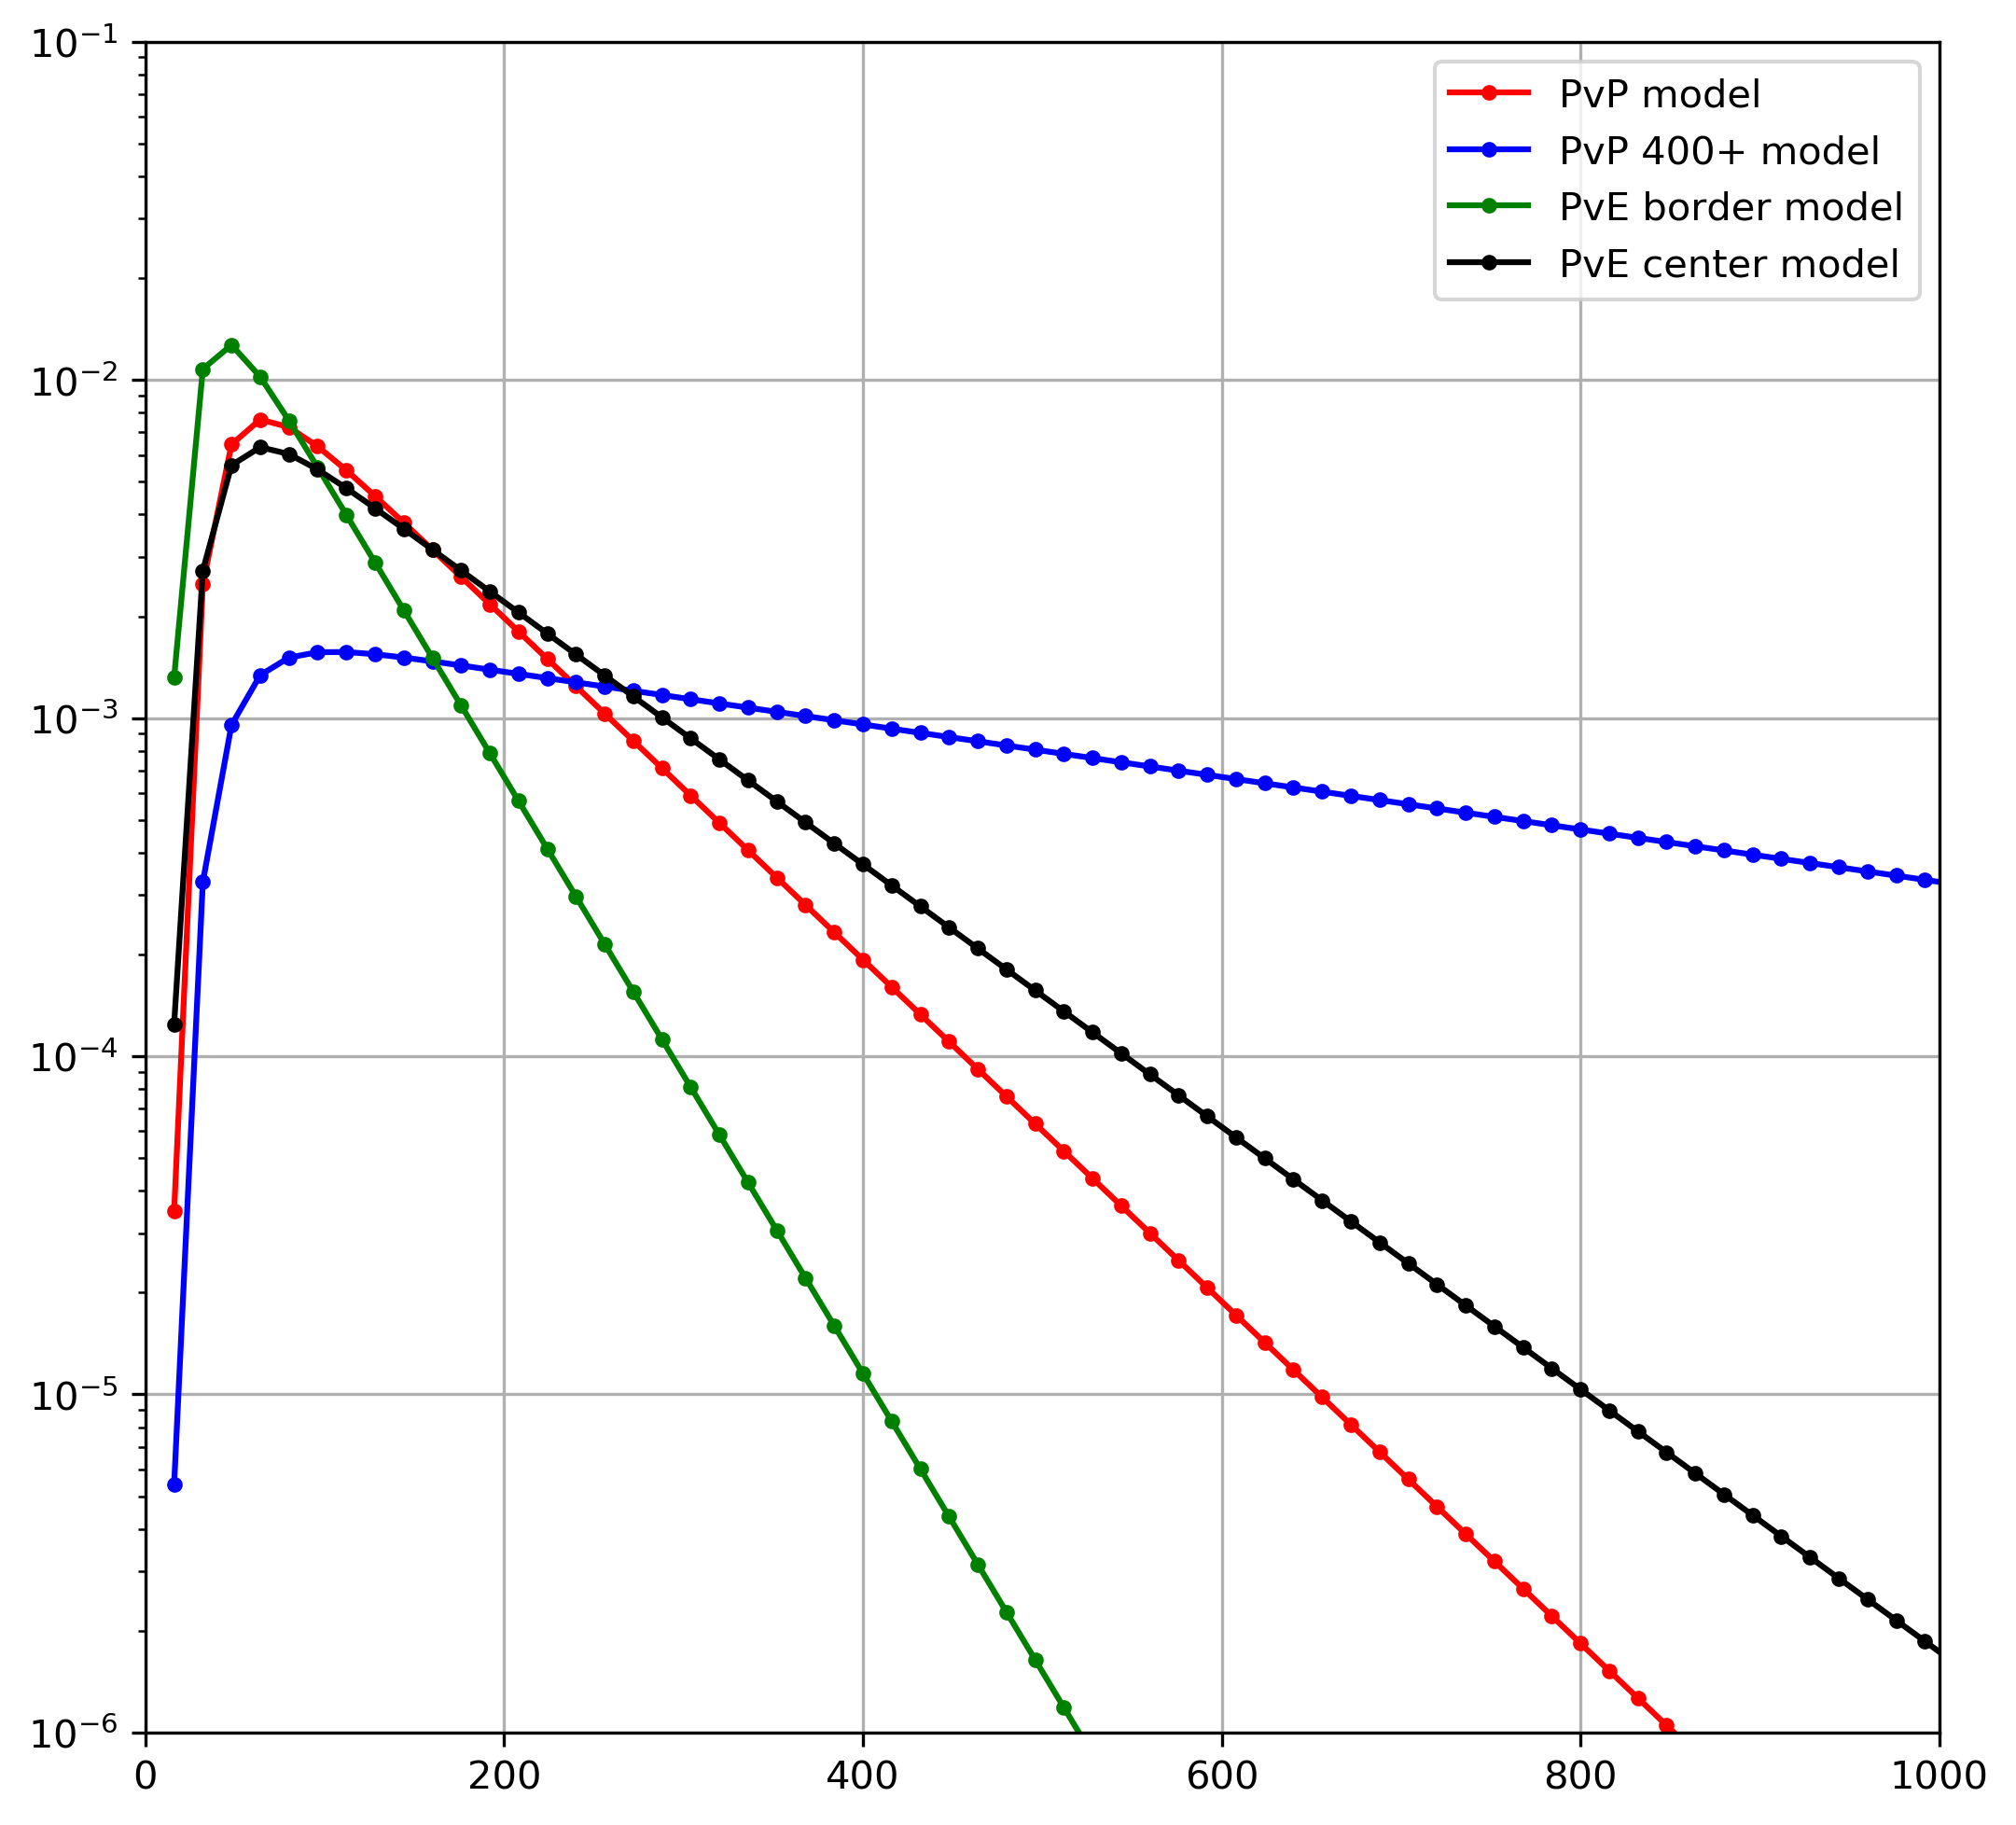

In [62]:
fig, axes = plt.subplots(1, figsize=(8.27, 8))
plt.rcParams['figure.dpi'] = 300
axes.set_xlim(0, 1000)
axes.set_ylim(0.000001, 0.1)
axes.set_yscale("log")

axes.grid()
axes.plot(x1, y1, 'r.-', label="PvP model")
axes.plot(x2, y2, 'b.-', label="PvP 400+ model")
axes.plot(x3, y3, 'g.-', label="PvE border model")
axes.plot(x4, y4, 'k.-', label="PvE center model")
axes.legend()
plt.show()

In [5]:
def find_mode(ys):
    mode = max(ys)
    mode_index = ys.index(mode)
    return mode_index

In [11]:
# u - index of mode
u1 = find_mode(y1)
u2 = find_mode(y2)
u3 = find_mode(y3)
u4 = find_mode(y4)

# t - index of item that is 2x of x of mode
t1 = x1.index(x1[u1] * 2)
t2 = x2.index(x2[u2] * 2)
t3 = x3.index(x3[u3] * 2)
t4 = x4.index(x4[u4] * 2)

xm1 = x1[t1:]
xm2 = x2[t2:]
xm3 = x3[t3:]
xm4 = x4[t4:]

ym1 = y1[t1:]
ym2 = y2[t2:]
ym3 = y3[t3:]
ym4 = y4[t4:]

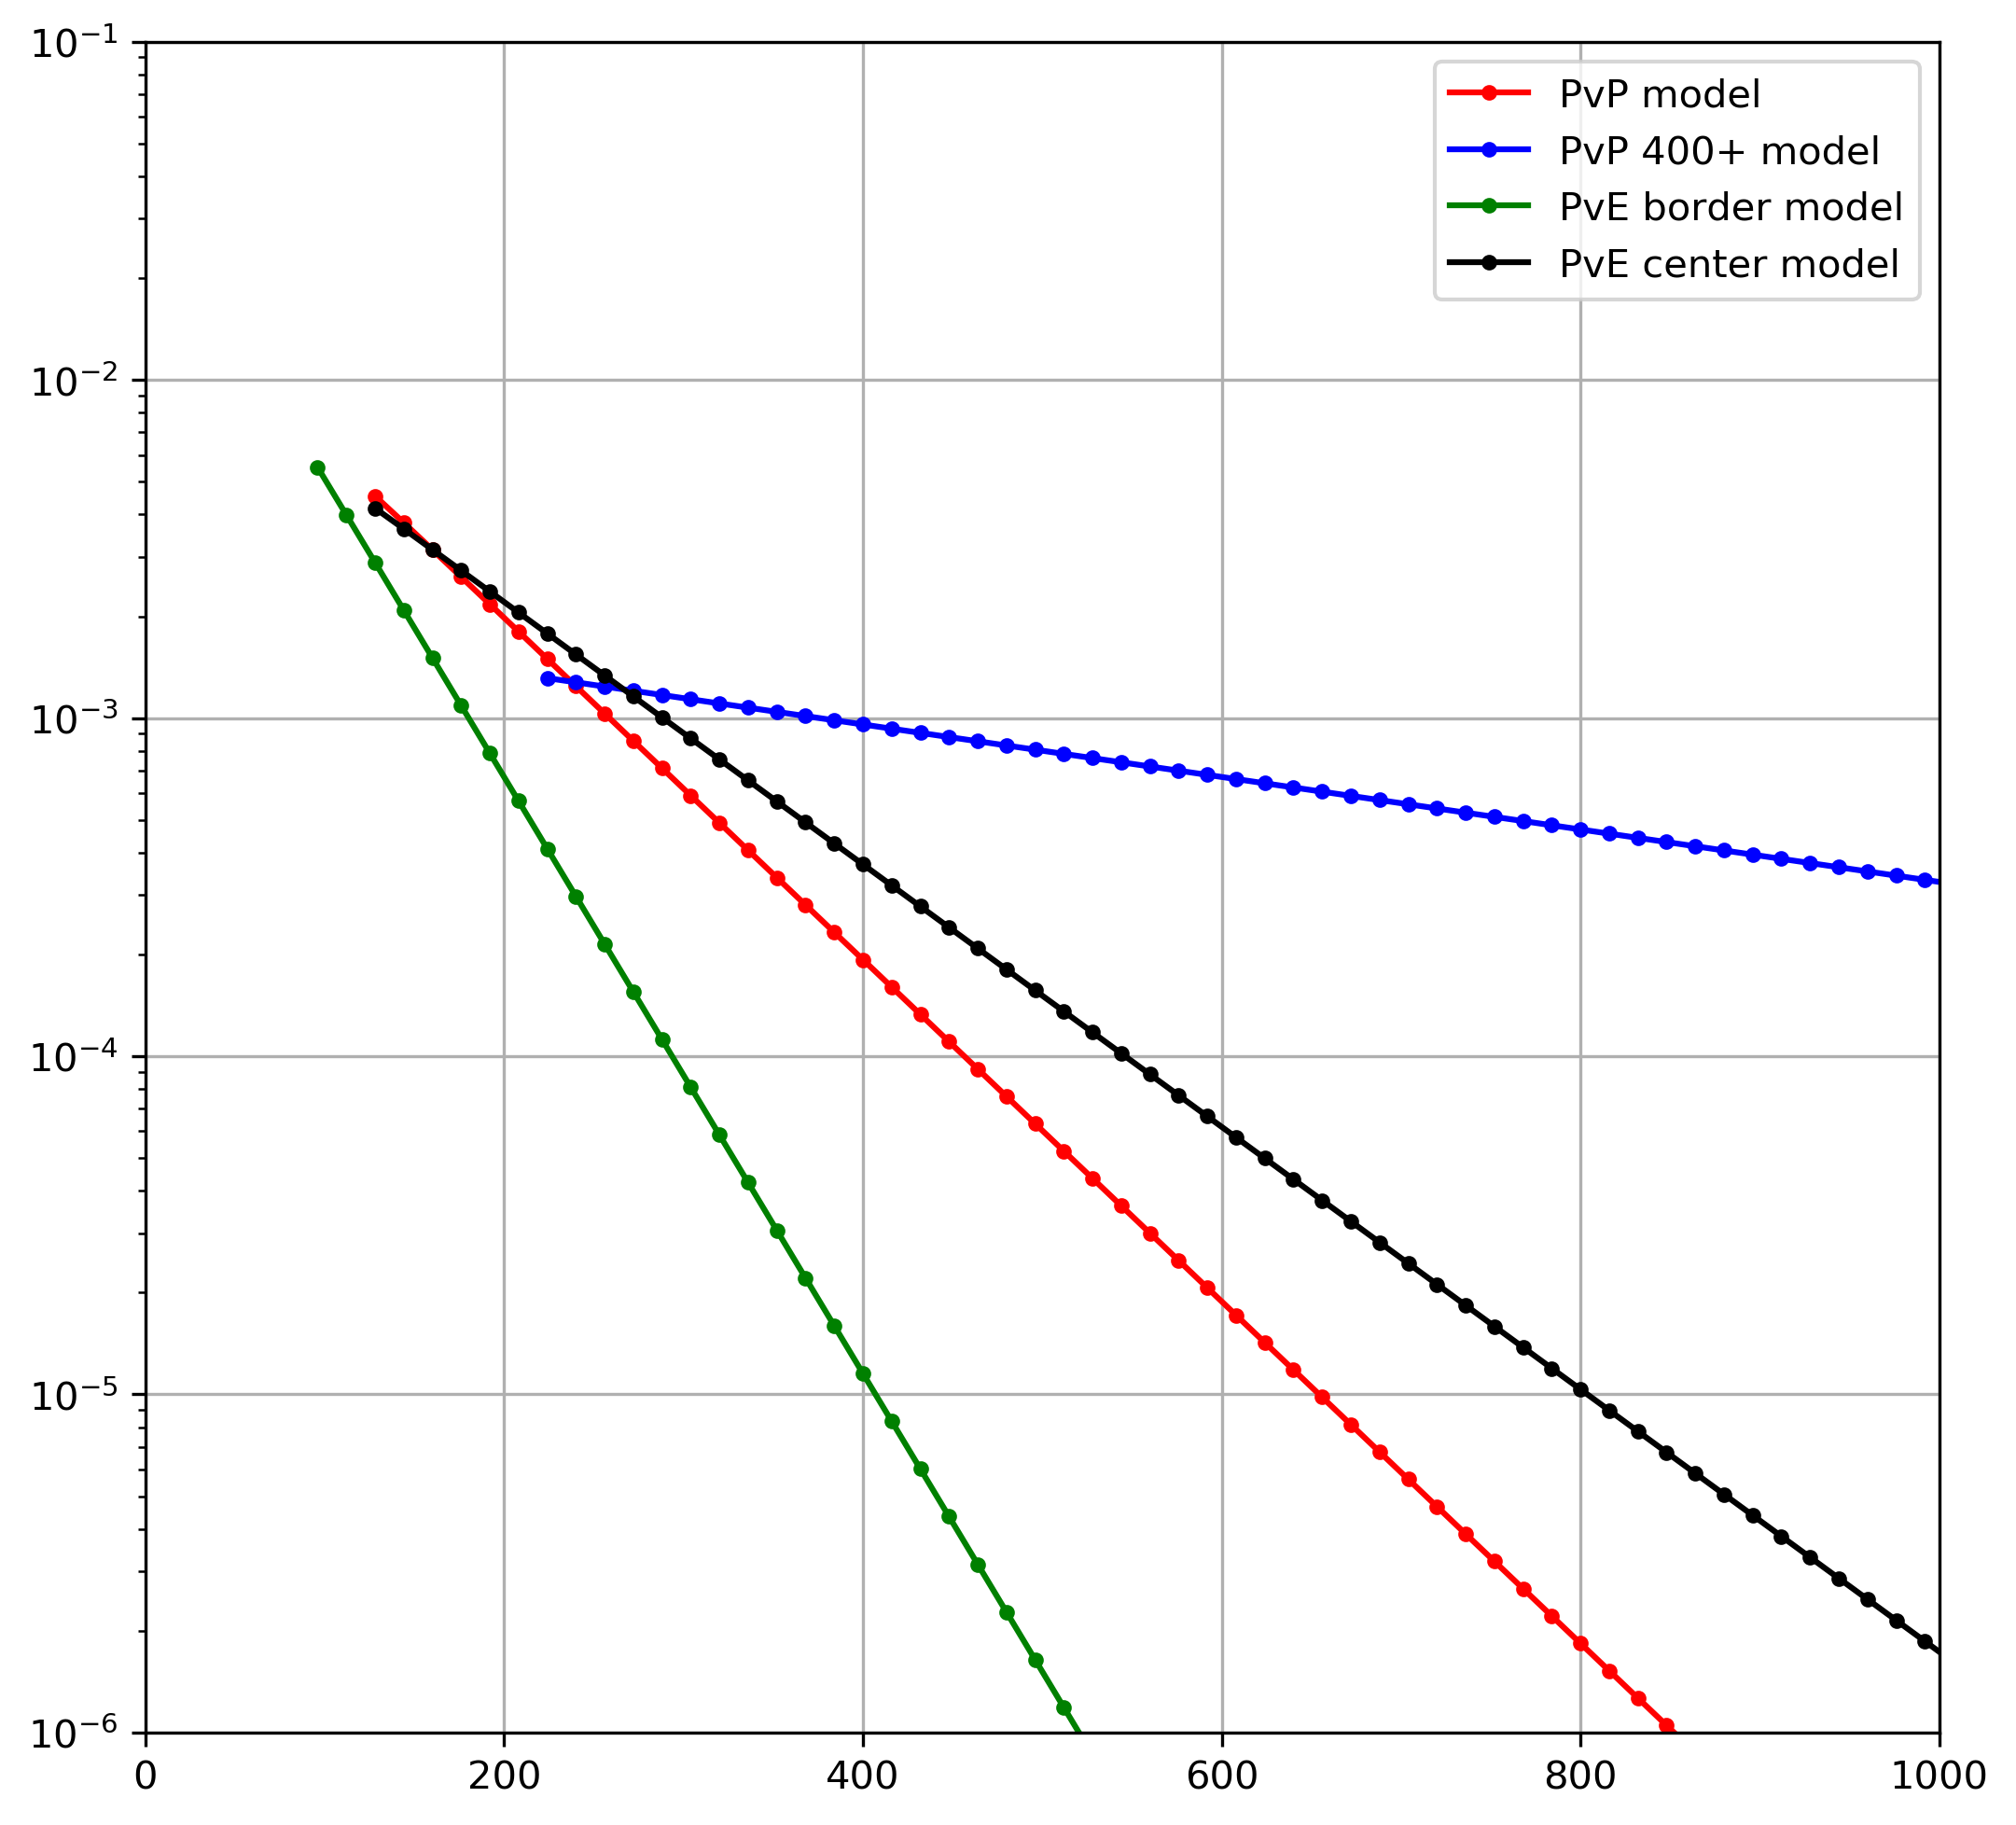

In [12]:
fig, axes = plt.subplots(1, figsize=(8.27, 8))
plt.rcParams['figure.dpi'] = 300
axes.set_xlim(0, 1000)
axes.set_ylim(0.000001, 0.1)
axes.set_yscale("log")

axes.grid()
axes.plot(xm1, ym1, 'r.-', label="PvP model")
axes.plot(xm2, ym2, 'b.-', label="PvP 400+ model")
axes.plot(xm3, ym3, 'g.-', label="PvE border model")
axes.plot(xm4, ym4, 'k.-', label="PvE center model")
axes.legend()
plt.show()

In [ ]:
def func(x, k, b):
    return (10 ** (k*x + b))

In [119]:
popt1, pcov1 = curve_fit(func, xm1, ym1, p0=(-0.005, -2))
popt2, pcov2 = curve_fit(func, xm2, ym2, p0=(-0.005, -2))
popt3, pcov3 = curve_fit(func, xm3, ym3, p0=(-0.005, -2))
popt4, pcov4 = curve_fit(func, xm4, ym4, p0=(-0.005, -2))
print(popt1[0], popt1[1])
print(popt2[0], popt2[1])
print(popt3[0], popt3[1])
print(popt4[0], popt4[1])

print(popt1[0] / popt2[0])

-0.0050287031883368945 -1.698386270518437
-0.0007764096088817247 -2.7081886953924657
-0.008804272652597514 -1.4129175586831895
-0.003870429985852062 -1.8830126185253717
6.476868821316904


In [157]:
def get_half(yt, ym):
    xt = np.arange(0, 10000, 0.1)
    for i in range(1, len(yt)):
        if (yt[i] < (ym[0] / 2)):
            half_index = i
            break
    return (half_index, xt[half_index])

PvP halves in  60.10000000000002
PvP 400+ halves in  387.30000000000007
PvE player border halves in  34.30000000000001
PvE player center halves in  78.0


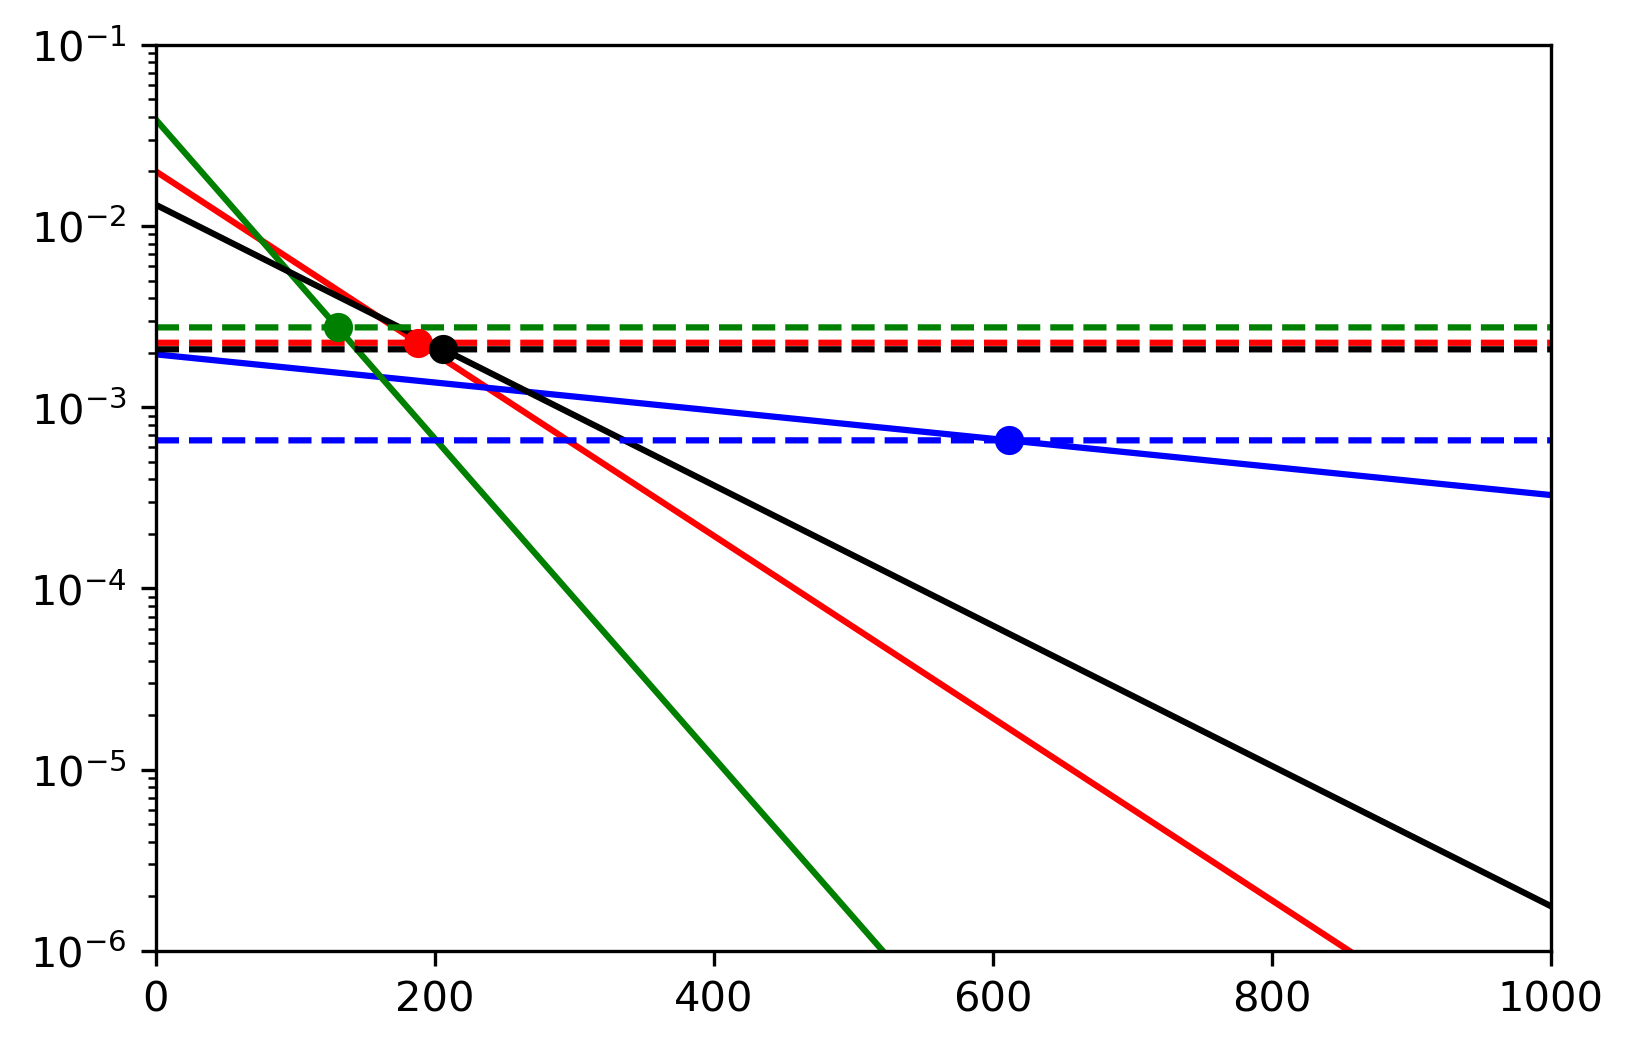

In [166]:
xt = np.arange(0, 10000, 0.1)
yt1 = func(xt, popt1[0], popt1[1]).tolist()
yt2 = func(xt, popt2[0], popt2[1]).tolist()
yt3 = func(xt, popt3[0], popt3[1]).tolist()
yt4 = func(xt, popt4[0], popt4[1]).tolist()

h1, xh1 = get_half(yt1, ym1)
h2, xh2 = get_half(yt2, ym2)
h3, xh3 = get_half(yt3, ym3)
h4, xh4 = get_half(yt4, ym4)


print("PvP halves in ", xh1 - xm1[0])
print("PvP 400+ halves in ", xh2 - xm2[0])
print("PvE player border halves in ", xh3 - xm3[0])
print("PvE player center halves in ", xh4 - xm4[0])

plt.yscale("log")
plt.plot(xt, yt1, 'r-')
plt.plot(xt, yt2, 'b-')
plt.plot(xt, yt3, 'g-')
plt.plot(xt, yt4, 'k-')

plt.plot(xt, [ym1[0] / 2]*len(xt), 'r--')
plt.plot(xt, [ym2[0] / 2]*len(xt), 'b--')
plt.plot(xt, [ym3[0] / 2]*len(xt), 'g--')
plt.plot(xt, [ym4[0] / 2]*len(xt), 'k--')

plt.plot(xh1, ym1[0] / 2, 'ro')
plt.plot(xh2, ym2[0] / 2, 'bo')
plt.plot(xh3, ym3[0] / 2, 'go')
plt.plot(xh4, ym4[0] / 2, 'ko')


plt.xlim(0, 1000)
plt.ylim(0.000001, 0.1)
plt.show()

In [167]:
(10 ** (kt+b)) / 2 = (10 ** (kx + b))
log10(1/2) = log10((10 ** (kx + b)) / (10 ** (kt+b)))
log10(1/2) = kx - kt
x - t = log10(1/2) * 1/k


SyntaxError: can't assign to operator (<ipython-input-167-76fb12b46600>, line 1)

In [ ]:
(10 ** (kt+b)) / 2 = (10 ** (kx + b))
log10(1/2) = log10((10 ** (kx + b)) / (10 ** (kt+b)))
log10(1/2) = kx - kt
x - t = - 1/k = tau

10^(kx + b) = 10^(-1/tau * x + b) = 10^(-x/tau) * C

In [170]:
d1 = math.log10(1/2) * 1 / popt1[0]
d2 = math.log10(1/2) * 1 / popt2[0]
d3 = math.log10(1/2) * 1 / popt3[0]
d4 = math.log10(1/2) * 1 / popt4[0]
print(d1)
print(d2)
print(d3)
print(d4)

59.86235106541228
387.7205951862955
34.19135316932383
77.77688700334686


In [ ]:
100 = log10(1/p) * 1/k
100 = -log10(p) * 1/k
100*k = -log10(p)
10^(100*k) = 1/p
p = 10^(-100k)

In [172]:
p1 = 10 ** (-100 * popt1[0])
p2 = 10 ** (-100 * popt2[0])
p3 = 10 ** (-100 * popt3[0])
p4 = 10 ** (-100 * popt4[0])
print(p1)
print(p2)
print(p3)
print(p4)

3.183246856173584
1.1957515730921529
7.593242419669764
2.4380521928504773


In [ ]:
p = -10 ^ (100 - 1/k)